## 1) Librerias y funciones

In [ ]:
## Declaramos librerías y funciones
import tweepy
from tweepy import OAuthHandler
import time
import pandas as pd
from datetime import datetime

##Ruta donde vamos a dejar los archivos
path = "/content/drive/MyDrive/Diplomatura - Compartido/Archivos Batch/"

def twitter_to(name):
    df_tweetsReplies = pd.DataFrame([],columns = ["id_tweet","reply",'fecha',"author","n_tweets","followers","friends","location"])
    
    counter= 0
    for tweet in tweepy.Cursor(api.search,q='to:' + name, result_type='recent',timeout=999999, tweet_mode = 'extended').items():
        if hasattr(tweet, 'in_reply_to_status_id_str'):      
            if hasattr(tweet, 'author'):  
                # guardamos la respuesta!
                aux = pd.DataFrame([{'id_tweet':tweet.in_reply_to_status_id_str,'reply':tweet.full_text,'fecha':tweet.created_at,
                                     "author":tweet.author.screen_name,"n_tweets":tweet.author.statuses_count,
                                     "followers":tweet.author.followers_count,"friends": tweet.author.friends_count,
                                     "location": tweet.author.location, "destino": name}])
                df_tweetsReplies = df_tweetsReplies.append(aux)
                # still alive
                counter += 1
                if((counter % 1000) == 0):
                    print(datetime.today(),"|| " + name +" || Counter:",counter)
    
    fecha=datetime.today().strftime('%Y%m%d')
    df_tweetsReplies.to_excel(path+"twitter_"+ name + "_" +fecha + ".xlsx")

# %% Main code:
df_aux = pd.DataFrame()

## 2) Conexión a TWT y  Google Drive
#### Se realiza la conexión con el módulo que devuelve los ultimos 7 días de interacciones

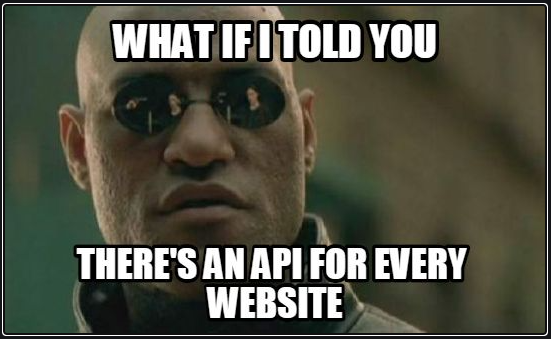

In [ ]:
## Conexión a TWT con credenciales

ACCESS_TOKEN = 'xxACCESS_SECRET = 'xxCONSUMER_KEY = 'xxCONSUMER_SECRET = 'xx
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True)

#### Conectamos con Google drive para usar como repositorio de archivos 
######(a ser reemplazado por una infraestructura cloud cuando de el presupuesto)

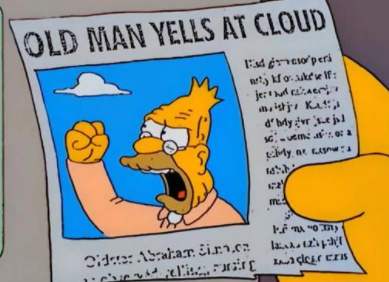

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3) Declaramos las cuentas a las que vamos realizar el seguimiento

In [ ]:
## Declaramos las cuentas: Competidores y la nuestra
competidores=['BurgerKing','McDonalds','kfc']
principal=['Wendys']

## 4) Realizamos la bajada de los twts a formato .xlsx y los dejamos disponible en Google Drive

In [ ]:
## Cuentas principales
df_tweetsAuthor = pd.DataFrame([],columns = ["id_tweet","tweetSource","Author","fecha"])

# Lista de las cuentas con que nos vamos a comparar
empresas = competidores + principal

for name in empresas:
    try:
        twitter_to(name)
    except:
        print("Fallo de conexion en " + name + " reconectando...")
        
        auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)        
        api = tweepy.API(auth,wait_on_rate_limit=True)
        
        print("Conectado!")
        # arrancamos devuelta
        twitter_to(name)

print("Carga Completa de Archivos")

2020-11-27 13:04:00.768007 || BurgerKing || Counter: 1000
2020-11-27 13:04:27.617465 || BurgerKing || Counter: 2000
2020-11-27 13:18:54.619043 || BurgerKing || Counter: 3000
2020-11-27 13:19:38.598509 || McDonalds || Counter: 1000
2020-11-27 13:34:01.095256 || McDonalds || Counter: 2000
2020-11-27 13:34:25.476779 || McDonalds || Counter: 3000
2020-11-27 13:34:50.490400 || McDonalds || Counter: 4000
2020-11-27 13:49:15.497312 || McDonalds || Counter: 5000
2020-11-27 13:49:41.777885 || McDonalds || Counter: 6000
2020-11-27 14:04:03.163831 || McDonalds || Counter: 7000
2020-11-27 14:04:31.756531 || McDonalds || Counter: 8000
2020-11-27 14:05:00.647969 || McDonalds || Counter: 9000
2020-11-27 14:19:17.646452 || McDonalds || Counter: 10000
2020-11-27 14:20:04.949590 || Wendys || Counter: 1000
2020-11-27 14:34:19.163253 || Wendys || Counter: 2000
2020-11-27 14:34:42.860255 || Wendys || Counter: 3000
Carga Completa de Archivos
